<a href="https://colab.research.google.com/github/Shivani11032006/Assignment/blob/main/day15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB

Summary Statistics:
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      475.000000   485.000000
mean   249.693069   52.918812      133.412632   200.470103
std    144.240508   21.064700       25.933424    58.533857
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      111.000000   149.000000
50%    249.000000   52.000000      132.

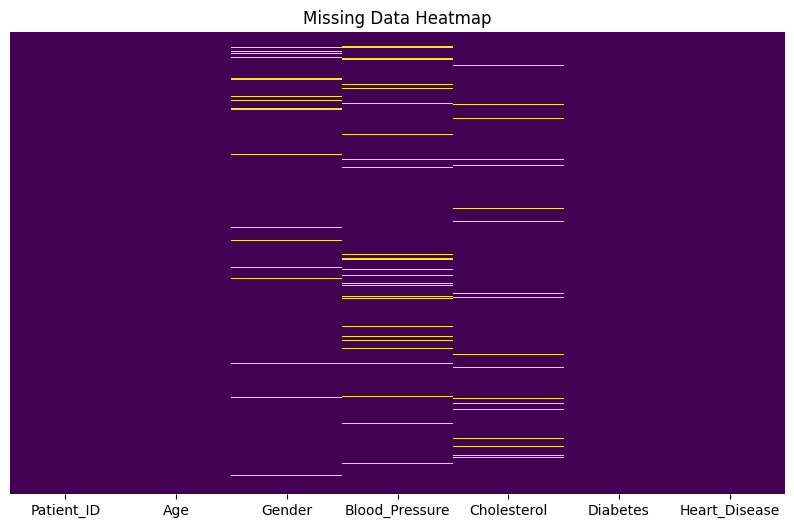


Percentage of Missing Values:
Patient_ID        0.000000
Age               0.000000
Gender            4.158416
Blood_Pressure    5.940594
Cholesterol       3.960396
Diabetes          0.000000
Heart_Disease     0.000000
dtype: float64


<ipython-input-1-0ee0be4ebbfa>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Median for numerical
<ipython-input-1-0ee0be4ebbfa>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

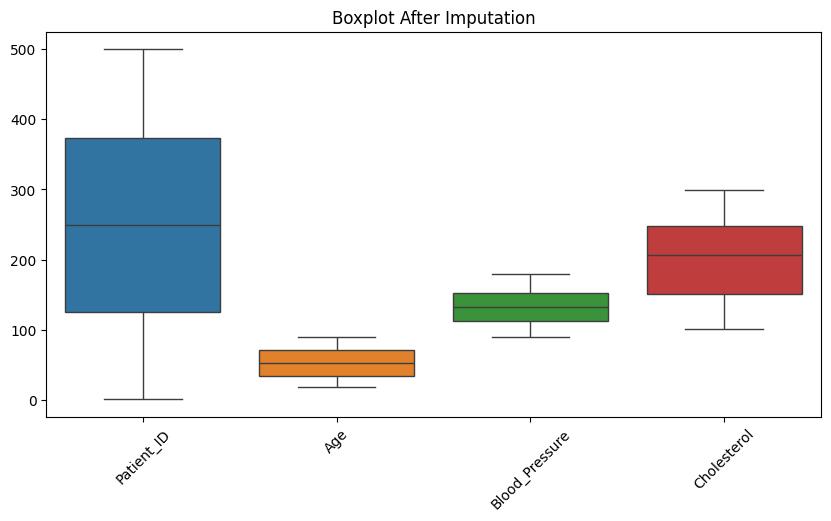

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Load the dataset
df = pd.read_csv("/content/Day_15_Healthcare_Data.csv")  # Replace with actual file path

# Initial Exploratory Data Analysis
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isna().sum())

# Visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Percentage of missing values
missing_percent = (df.isna().sum() / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percent)

# Mean/Median/Mode Imputation
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)  # Median for numerical

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Mode for categorical

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include=['number'])),
                       columns=df.select_dtypes(include=['number']).columns)

# Evaluate Effect of Imputation
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title("Boxplot After Imputation")
plt.xticks(rotation=45)
plt.show()

# Save the cleaned dataset
df.to_csv("cleaned_healthcare_dataset.csv", index=False)
